In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv (r'C:\Users\sagar singh\ITv files\AWP\Zomato Data Analysis\zomato.csv')

In [3]:
data.isnull().sum()    #checking null values

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [41]:
data.info()     #checking data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          51717 non-null  object 
 1   online_order  51717 non-null  object 
 2   book_table    51717 non-null  object 
 3   rate          41665 non-null  float64
 4   votes         51717 non-null  int32  
 5   location      51696 non-null  object 
 6   rest_type     51490 non-null  object 
 7   cuisines      51672 non-null  object 
 8   cost          51371 non-null  float64
 9   listed_type   51717 non-null  object 
 10  city          51717 non-null  object 
dtypes: float64(2), int32(1), object(8)
memory usage: 4.1+ MB


cleaning data

In [18]:
data.rename(columns = {'approx_cost(for two people)':'cost'}, inplace = True)

In [13]:
data.rename(columns = {'listed_in(type)':'listed_type'}, inplace = True)

In [14]:
data.rename(columns = {'listed_in(city)':'city'}, inplace = True)

In [23]:
data=data.replace('/5',' ', regex=True)       #for rate coloumn

In [21]:
data=data.replace(r'\n',' ', regex=True) 

In [27]:
data['cost']=data['cost'].replace(',','',regex=True)

In [38]:
data['rate'] = data['rate'].replace({'-': np.nan, 'NEW': np.nan})

In [30]:
data.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines', 'cost',
       'reviews_list', 'menu_item', 'listed_type', 'city'],
      dtype='object')

In [31]:
data.drop(['url', 'address', 'phone', 'menu_item', 'reviews_list','dish_liked'], axis=1, inplace=True)

In [34]:
data['cost'] = data['cost'].astype(float)

In [36]:
data['votes']=data['votes'].astype(int)

In [39]:
data['rate'] = data['rate'].astype(float)

In [49]:
data['rest_type'] = data['rest_type'].astype(str)
data['rest_type'] = data['rest_type'].apply(lambda string: string.split(','))
data['rest_type'] = data['rest_type'].apply(lambda lst: sorted([string.strip() for string in lst]))
data['rest_type'] = data['rest_type'].apply(lambda lst: ', '.join(lst))

In [56]:
data['cuisines'] = data['cuisines'].astype('str')
data['cuisines'] = data['cuisines'].apply(lambda string: string.split(','))
data['cuisines'] = data['cuisines'].apply(lambda lst: sorted([string.strip() for string in lst]))
data['cuisines'] = data['cuisines'].apply(lambda lst: ', '.join(lst))

In [59]:
data.dropna(how='any', inplace=True)
data.drop_duplicates(inplace=True)

In [188]:
data.sample(3)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,listed_type,city
45833,Oye Amritsar,Yes,Yes,3.9,1489,Indiranagar,['Casual Dining'],['North Indian'],600.0,Dine-out,Old Airport Road
2800,Ragoo's,Yes,No,3.9,233,Jayanagar,['Casual Dining'],"' North Indian', ' Pizza', ' Salad'], ['Italian'",800.0,Delivery,Basavanagudi
5053,Japan Travel Cafe Azuki,No,No,4.3,67,Residency Road,['Cafe'],"' Japanese'], ['Cafe'",400.0,Cafes,Brigade Road


## Insights and visualisation

heatmap showing corelation

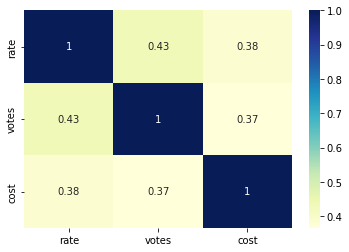

In [73]:
dataplot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
plt.show()

pie chart to show Online Delivery Distribution

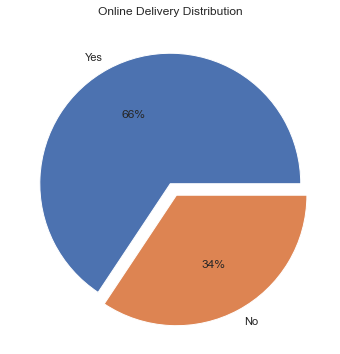

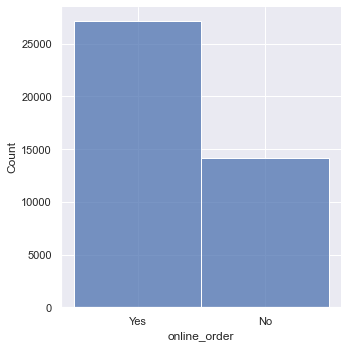

In [127]:
plt.figure(figsize=(12,6))
plt.title('Online Delivery Distribution')
plt.pie(data['online_order'].value_counts()/51717*100, labels=data['online_order'].value_counts().index,explode=(0, 0.1),
        autopct='%1.f%%');

sns.set_style('darkgrid')
sns.displot(data,x='online_order',palette='hot')

pie chart to show resturants booking service availablilty

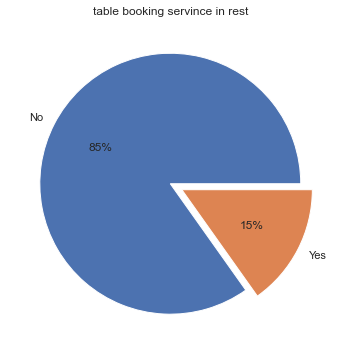

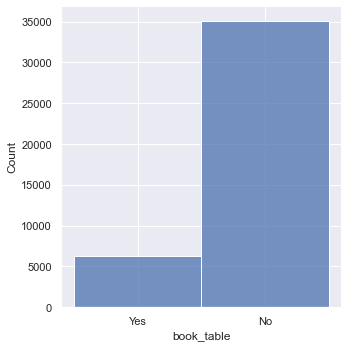

In [128]:
plt.figure(figsize=(12,6))
plt.title('table booking servince in rest')
plt.pie(data['book_table'].value_counts()/51717*100, labels=data['book_table'].value_counts().index,explode=(0, 0.1),
        autopct='%1.f%%');

sns.set_style('darkgrid')
sns.displot(data,x='book_table',palette='hot')

Text(0, 0.5, 'Ratings Count')

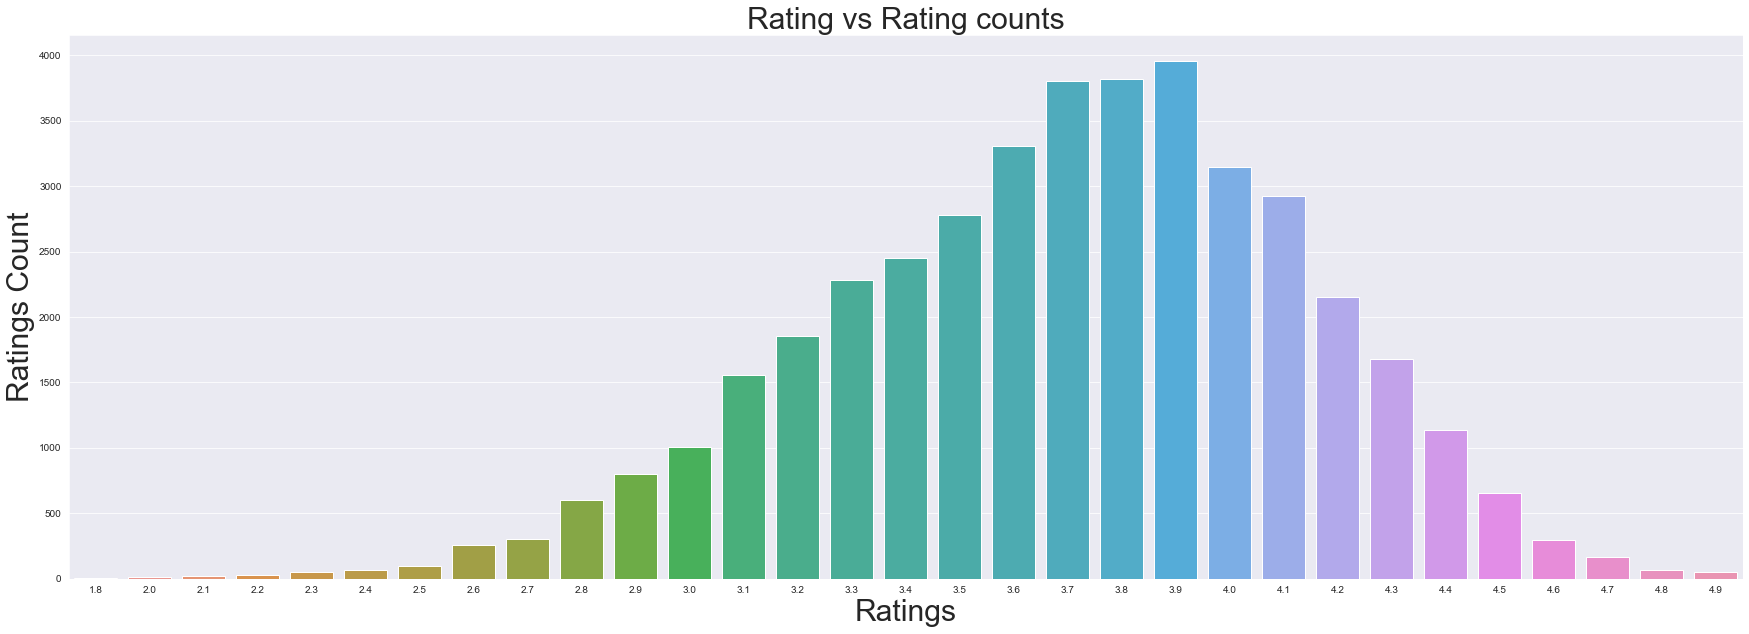

In [76]:
ratings=data.groupby(['rate']).size().reset_index().rename(columns={0:"Rating_Count"})
plt.figure(figsize=(30,10))
sns.barplot(x='rate',y='Rating_Count',data=ratings)
plt.title('Rating vs Rating counts',size=30)
plt.xlabel('Ratings',size=30)
plt.ylabel('Ratings Count',size=30)

bargraph to show number of orders from areas of banglore

In [77]:
x = list(data.city.value_counts().index)
y = list(data.city.value_counts().values)

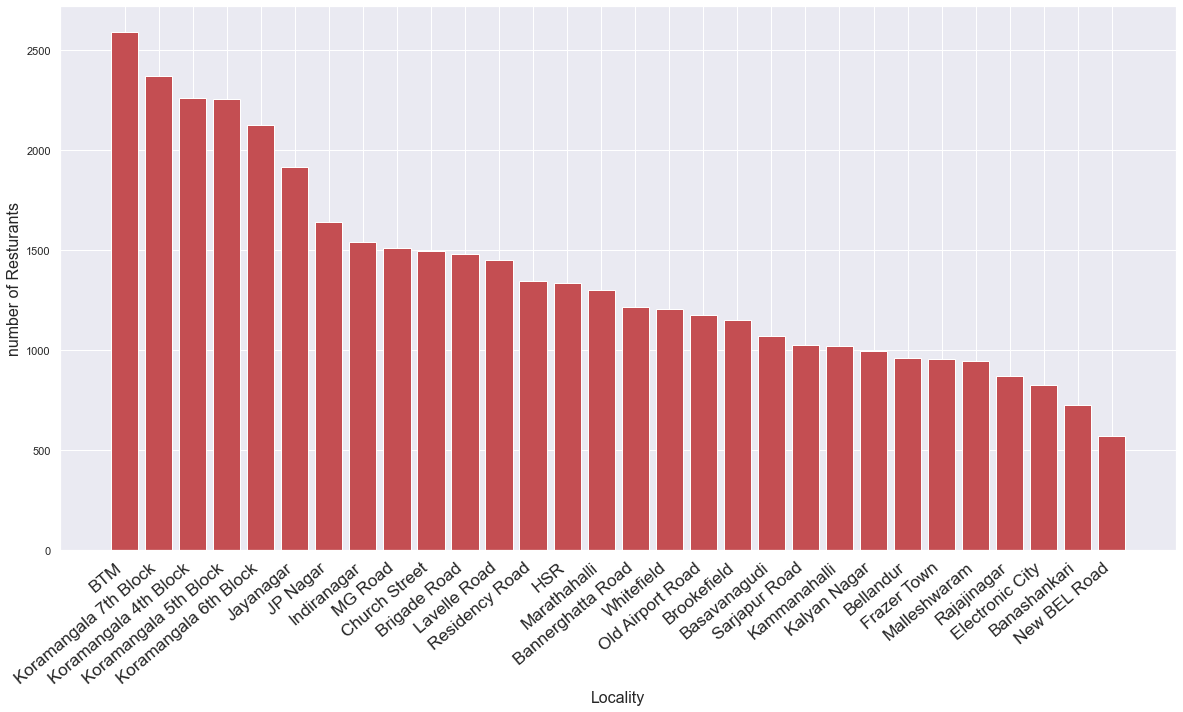

In [162]:
fig=plt.figure(figsize=(20,10))
sns.set_style(style="darkgrid")
plt.bar(x,y,color='r')
plt.xticks(rotation=40,horizontalalignment="right",fontsize="x-large")
plt.xlabel('Locality',fontsize=16)
plt.ylabel('number of Resturants',fontsize=16)
plt.show()

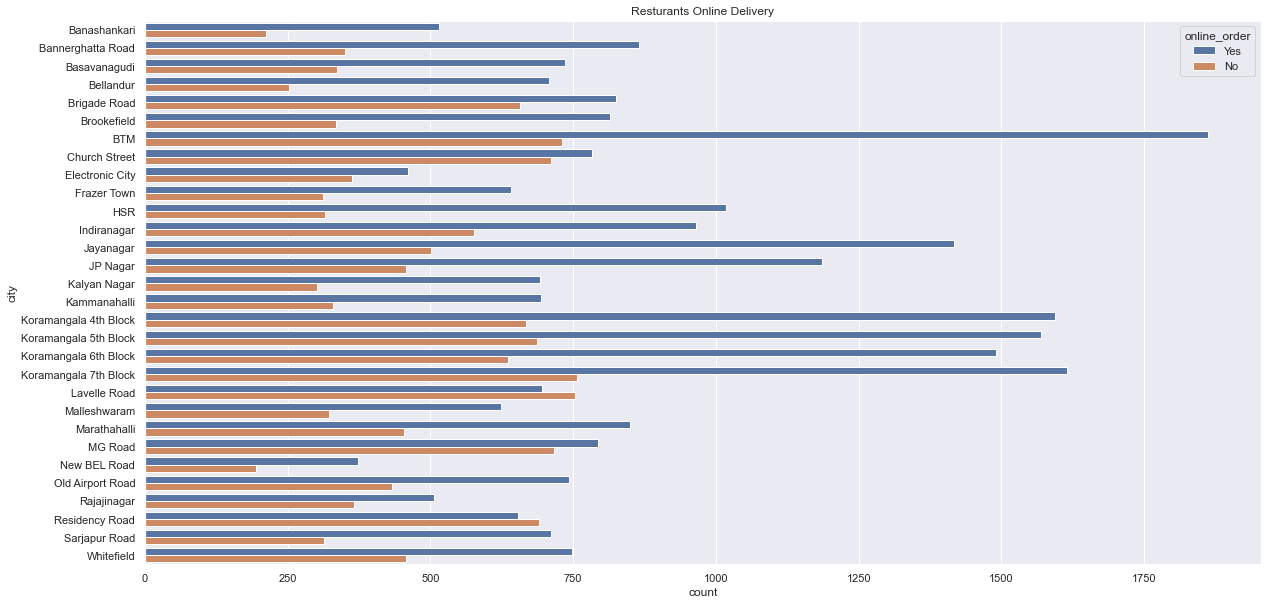

In [79]:
top_locality = data.city.value_counts()
sns.set_theme(style="darkgrid")
plt.figure(figsize=(20,10))
ax = sns.countplot(y= "city", hue="online_order", data=data[data.city.isin(top_locality.index)])
plt.title('Resturants Online Delivery');

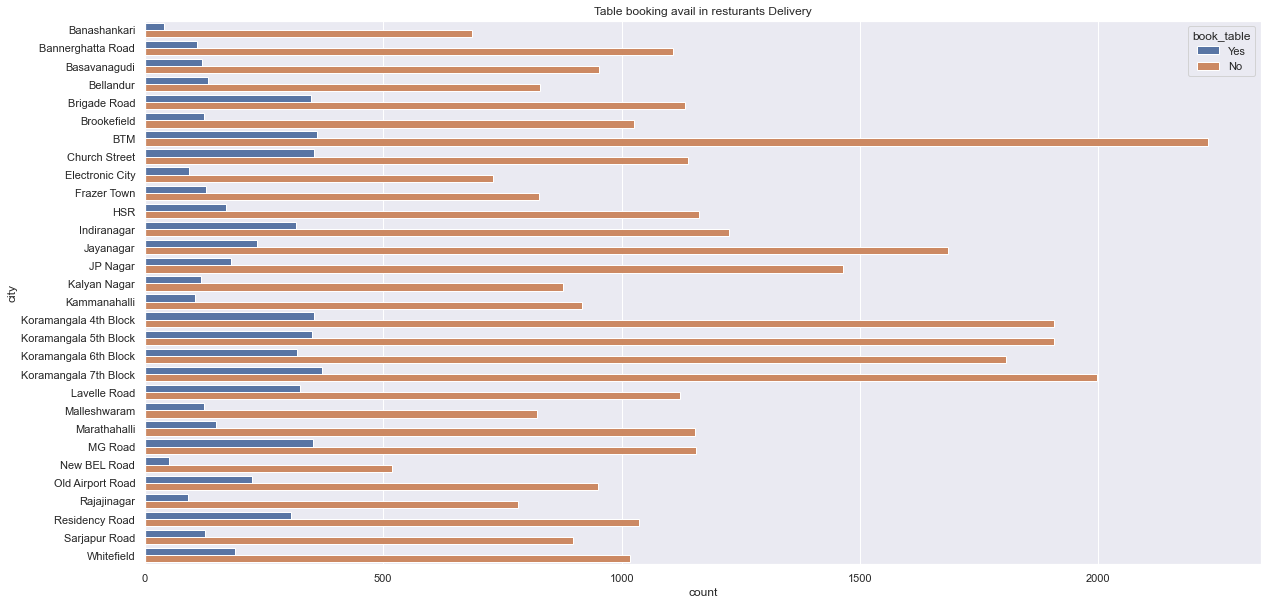

In [81]:
top_locality = data.city.value_counts()
sns.set_theme(style="darkgrid")
plt.figure(figsize=(20,10))
ax = sns.countplot(y= "city", hue="book_table", data=data[data.city.isin(top_locality.index)])
plt.title('Table booking avail in resturants Delivery');

In [89]:
l=pd.unique(data.listed_type)
p= list(data.listed_type.value_counts().values)

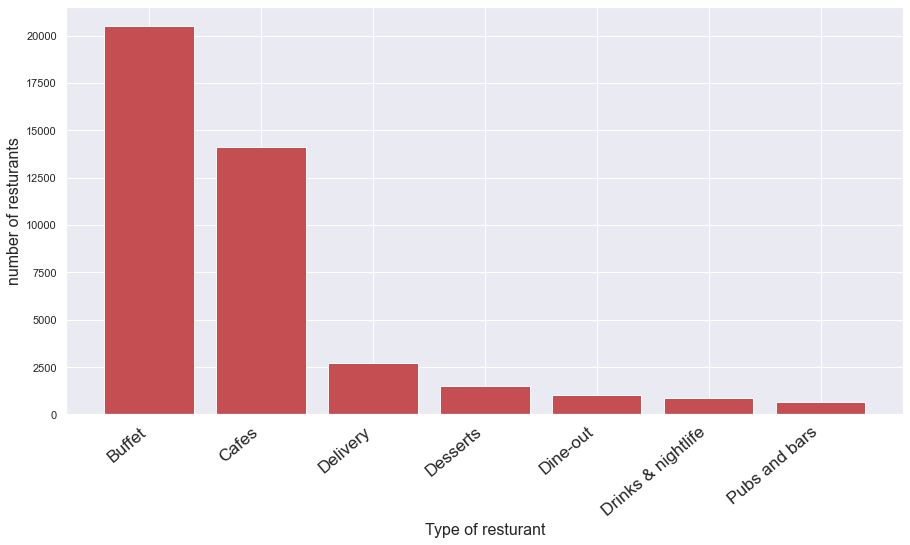

In [120]:
fig=plt.figure(figsize=(15,7.5))
sns.set_style(style="darkgrid")
plt.bar(l,p,color='r')
plt.xticks(rotation=40,horizontalalignment="right",fontsize="x-large")
plt.xlabel('Type of resturant',fontsize=16)
plt.ylabel('number of resturants',fontsize=16)
plt.show()

Text(0.5, 0, 'Rating')

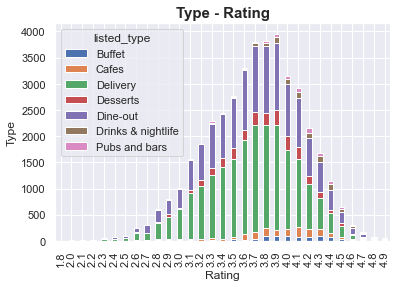

In [118]:
type_plt = pd. crosstab(data[ 'rate'], data[ 'listed_type'])
type_plt.plot(kind = 'bar', stacked = True)
plt.title('Type - Rating', fontsize = 15, fontweight = 'bold')
plt.ylabel('Type')
plt.xlabel('Rating')

Text(0.5, 0, 'Number of outlets')

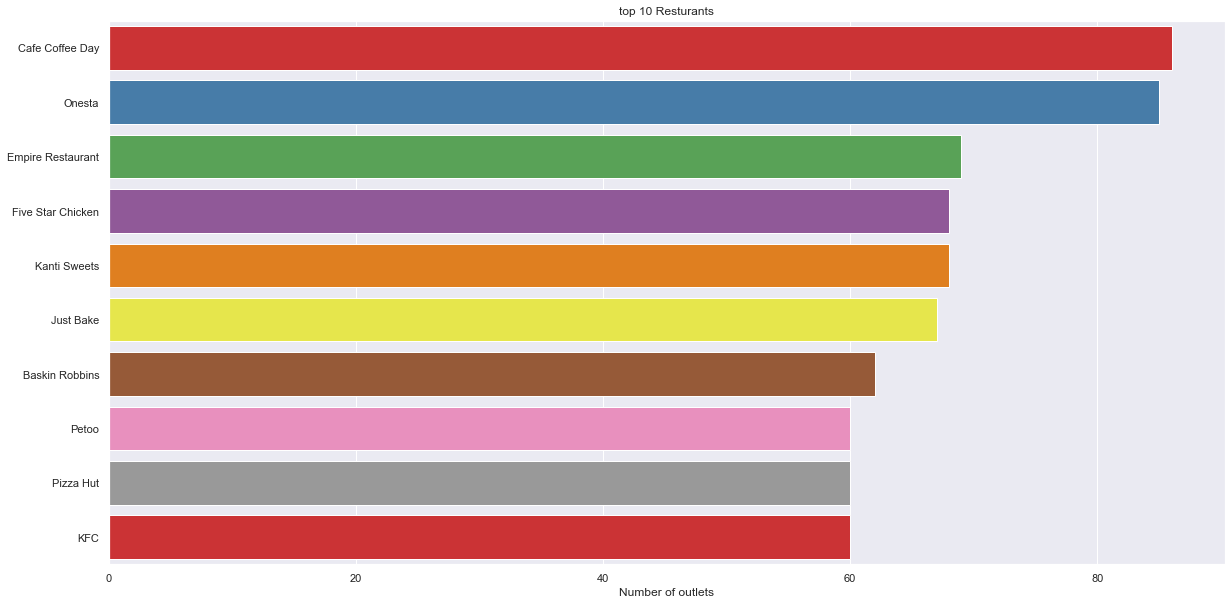

In [156]:
plt.figure(figsize=(20,10))
rest=data['name'].value_counts()[:10]
sns.barplot(x=rest,y=rest.index,palette='Set1')
plt.title('top 10 Resturants')
plt.xlabel('Number of outlets')

Text(0.5, 0, 'Number of orders')

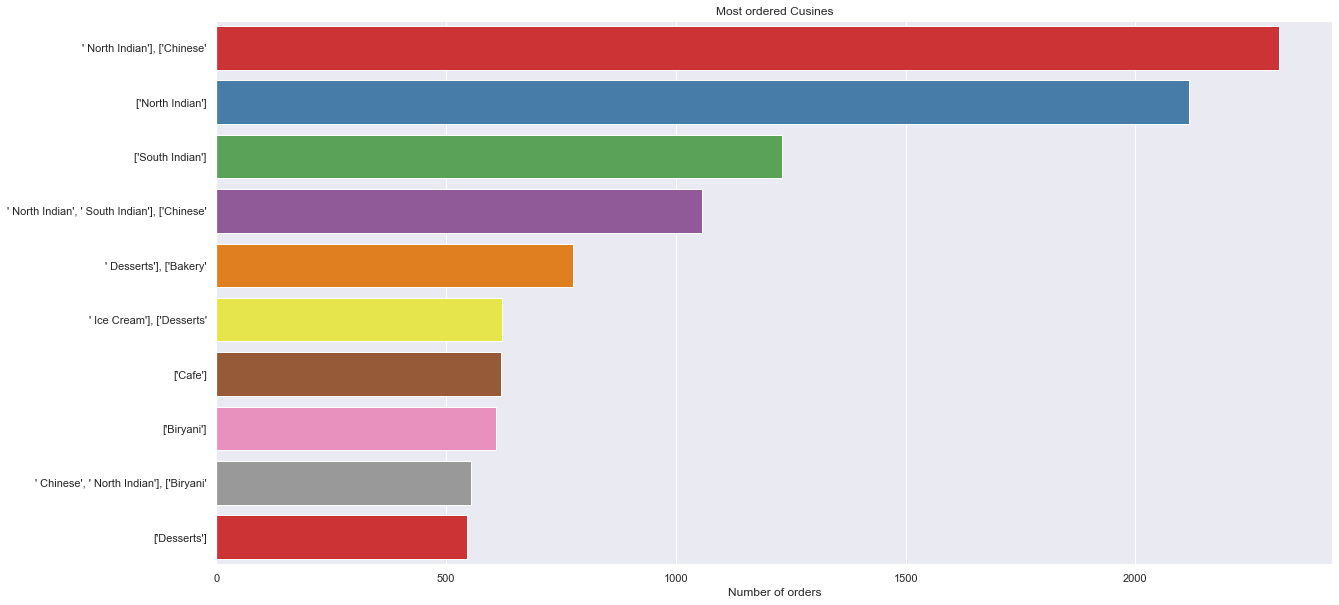

In [126]:
plt.figure(figsize=(20,10))
rest=data['cuisines'].value_counts()[:10]
sns.barplot(x=rest,y=rest.index,palette='Set1')
plt.title('Most ordered Cusines')
plt.xlabel('Number of orders')

In [180]:
cn=data.groupby('cost')[['name']].max()
maxx=pd.DataFrame(cn)

In [186]:
maxx.tail()    ## most costly resturants

,name
cost,
4000.0,Riwaz - The Ritz-Carlton
4100.0,La Brasserie - Le Meridien
4500.0,Malties - Radisson Blu
5000.0,Royal Afghan - ITC Windsor
6000.0,Le Cirque Signature - The Leela Palace


In [187]:
maxx.head()    # most cheap resturants

,name
cost,
40.0,Srinidhi Sagar Food Line
50.0,Savera Cafe
70.0,Nellore Dosa Camp
80.0,Dosa Cafe
100.0,Yi Moi Chinese Fast Food
